In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, Input, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D,GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [9]:
data_dir = "C:/Users/VAISHU/Desktop/project/Food/"

In [10]:
Food=[]
for file in os.listdir(data_dir):
    Food+=[file]
print(Food)
print(len(Food))

['apple_pie', 'cannoli', 'cheesecake', 'cheese_plate', 'chicken_wings', 'chocolate_cake', 'deviled_eggs', 'donuts', 'french_fries', 'frozen_yogurt', 'ice_cream', 'macarons']
12


In [12]:
train_dir = os.path.join(data_dir)

train_data = []
for defects_id, sp in enumerate(Food):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])

train = pd.DataFrame(train_data, columns=['File', 'LabelID', 'Label'])
train.head()

,File,LabelID,Label
0,apple_pie/1005649.jpg,0,apple_pie
1,apple_pie/1011328.jpg,0,apple_pie
2,apple_pie/101251.jpg,0,apple_pie
3,apple_pie/1014775.jpg,0,apple_pie
4,apple_pie/1026328.jpg,0,apple_pie


In [13]:
SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train))  # Reset indices
train.tail()

,File,LabelID,Label
11997,macarons/894308.jpg,11,macarons
11998,chocolate_cake/1668556.jpg,5,chocolate_cake
11999,chocolate_cake/2459075.jpg,5,chocolate_cake
12000,apple_pie/532423.jpg,0,apple_pie
12001,donuts/1949443.jpg,7,donuts


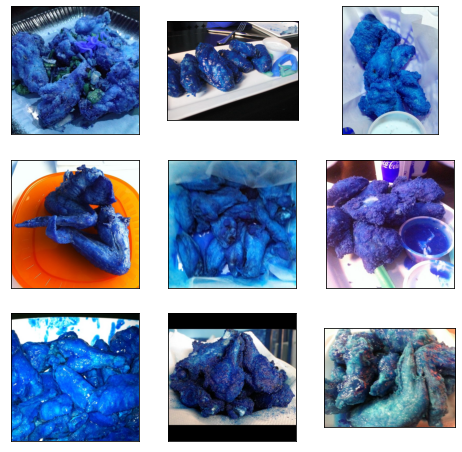

In [8]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(8, 8))
    defect_files = train['File'][train['Label'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1


plot_defects('chicken_wings', 3, 3)

In [9]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2)


train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    class_mode='categorical')

Found 12000 images belonging to 12 classes.


In [10]:
IMAGE_SIZE = 128


def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))


def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [11]:
x_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        x_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))


x_train = x_train / 255.

num_classes=15
y_train = train['LabelID'].values
y_train = to_categorical(y_train,num_classes)

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=SEED)
print('Train Shape: {}'.format(X_train.shape))
print('Train Shape: {}'.format(Y_train.shape))

12000it [09:16, 21.56it/s]


Train Shape: (8400, 128, 128, 3)
Train Shape: (8400, 15)


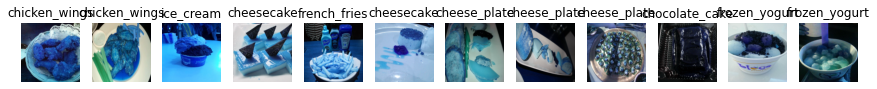

In [16]:
fig, ax = plt.subplots(1, 12, figsize=(15, 15))
for i in range(12):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(Food[np.argmax(Y_train[i])])